In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold

In [56]:
data = pd.read_csv("C:/Users/ncmia/OneDrive/Desktop/Depression_Student_Dataset_Unclean.csv")
data.head()

,ID,Gender,Age,Academic Pressure,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,Male,28.0,2.0,7-8 hours,Moderate,Yes,9.0,2.0,Yes,No
1,2,Male,28.0,NaN,5-6 hours,Healthy,Yes,7.0,NaN,Yes,No
2,3,Male,25.0,1.0,5-6 hours,Unhealthy,Yes,10.0,4.0,No,Yes
3,4,Male,23.0,1.0,More than 8 hours,Unhealthy,Yes,7.0,2.0,Yes,No
4,5,Female,31.0,1.0,More than 8 hours,Healthy,Yes,4.0,2.0,Yes,No


In [57]:
categorical_columns = data.select_dtypes(include='object').columns

for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

print(data[categorical_columns].isnull().sum())


Gender                                   0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Family History of Mental Illness         0
Depression                               0
dtype: int64


C:\Users\ncmia\AppData\Local\Temp\ipykernel_15700\2722591284.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [58]:
numerical_columns = ['Age', 'Academic Pressure', 'Study Hours', 'Financial Stress']

mean_values = data[numerical_columns].mean()

data[numerical_columns] = data[numerical_columns].fillna(mean_values)
print(data.isnull().sum())

ID                                       0
Gender                                   0
Age                                      0
Academic Pressure                        0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [59]:
print("\nDataset Info:\n")
data.info()



Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     502 non-null    int64  
 1   Gender                                 502 non-null    object 
 2   Age                                    502 non-null    float64
 3   Academic Pressure                      502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    float64
 8   Financial Stress                       502 non-null    float64
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    obj

In [60]:
print("\nStatistical Summary:\n", data.describe())


Statistical Summary:
                ID         Age  Academic Pressure  Study Hours  \
count  502.000000  502.000000         502.000000   502.000000   
mean   251.500000   27.097345           2.970179     6.697778   
std    145.059183    8.098658           1.306069     4.083680   
min      1.000000   18.000000           1.000000     0.000000   
25%    126.250000   23.000000           2.000000     4.000000   
50%    251.500000   27.097345           3.000000     6.697778   
75%    376.750000   30.000000           4.000000    10.000000   
max    502.000000  100.000000           5.000000    24.000000   

       Financial Stress  
count        502.000000  
mean           2.971111  
std            1.361522  
min            1.000000  
25%            2.000000  
50%            3.000000  
75%            4.000000  
max            5.000000  


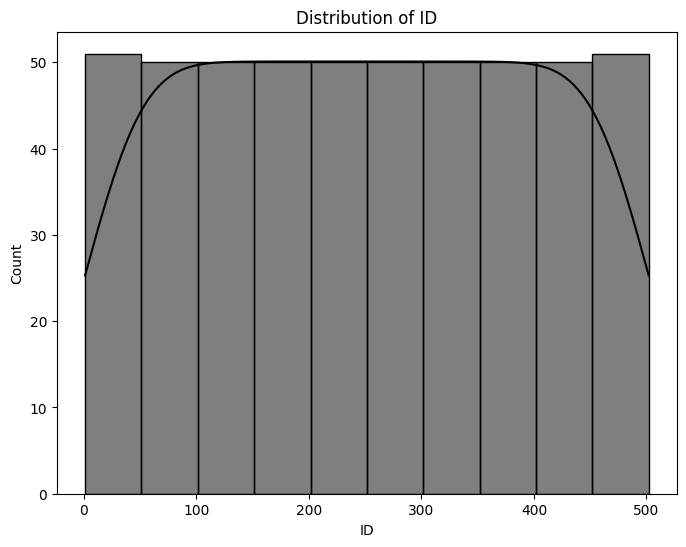

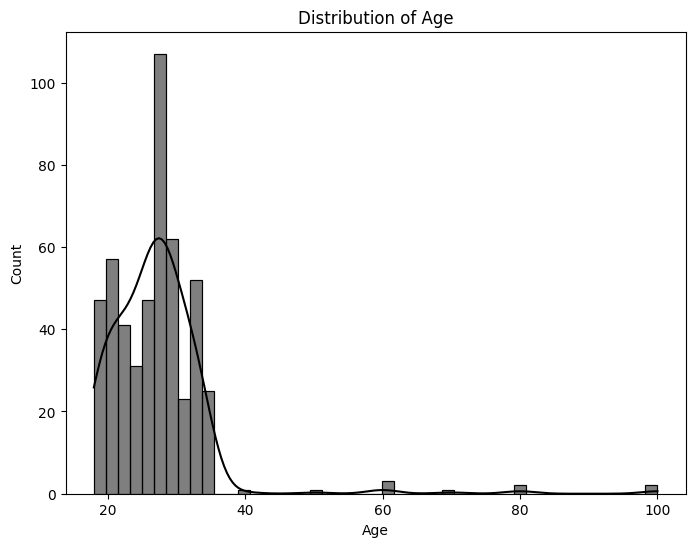

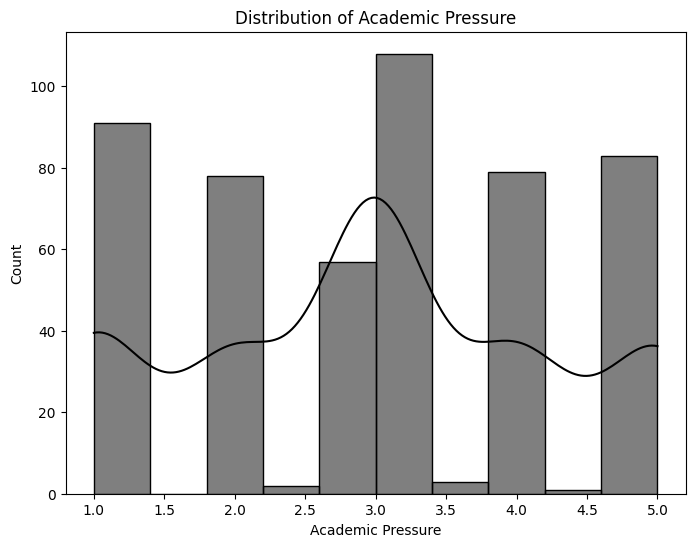

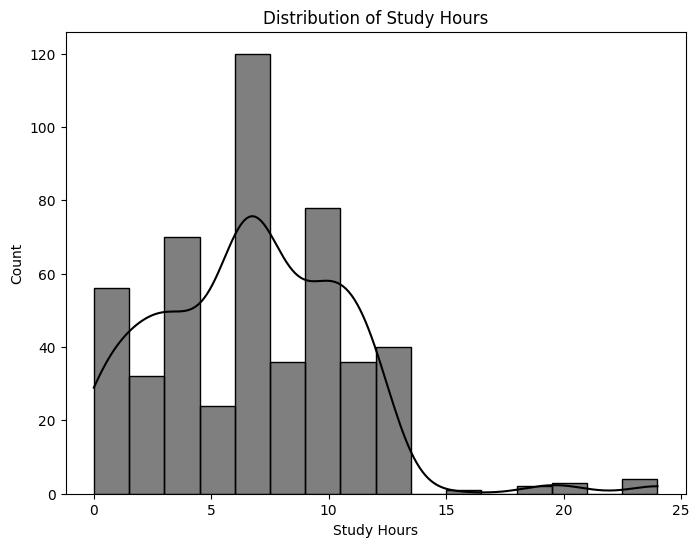

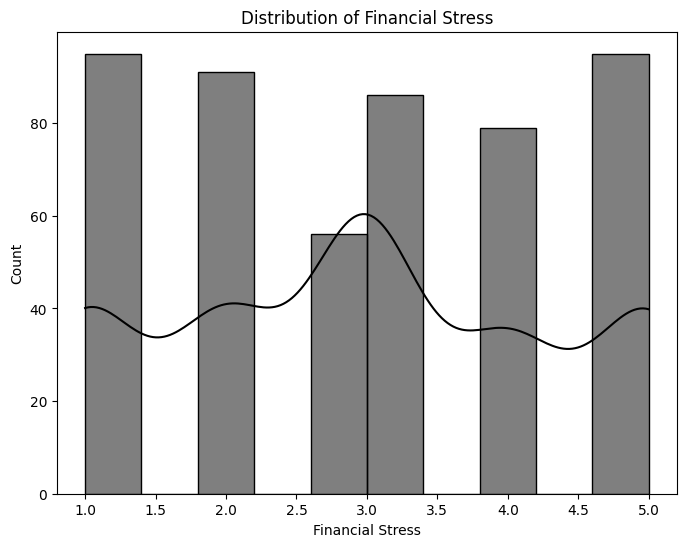

In [61]:
numerical_features = data.select_dtypes(include=[np.number]).columns
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True, color='black')
    plt.title(f'Distribution of {col}')
    plt.show()

C:\Users\ncmia\AppData\Local\Temp\ipykernel_15700\2178482466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='coolwarm')


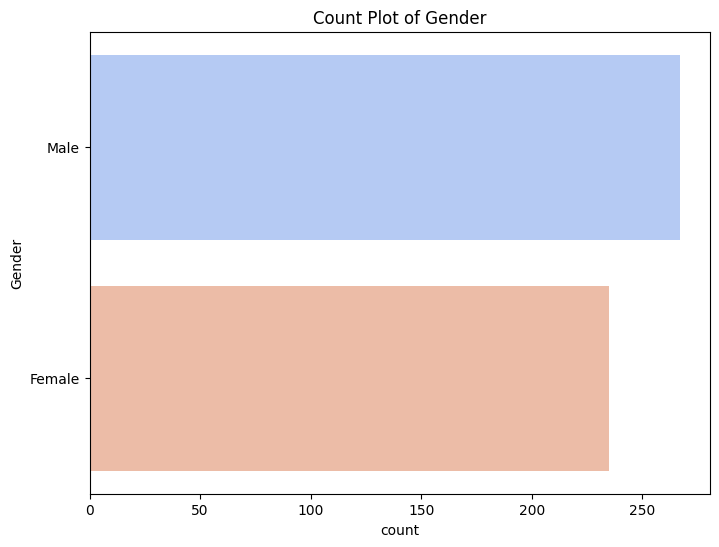

C:\Users\ncmia\AppData\Local\Temp\ipykernel_15700\2178482466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='coolwarm')


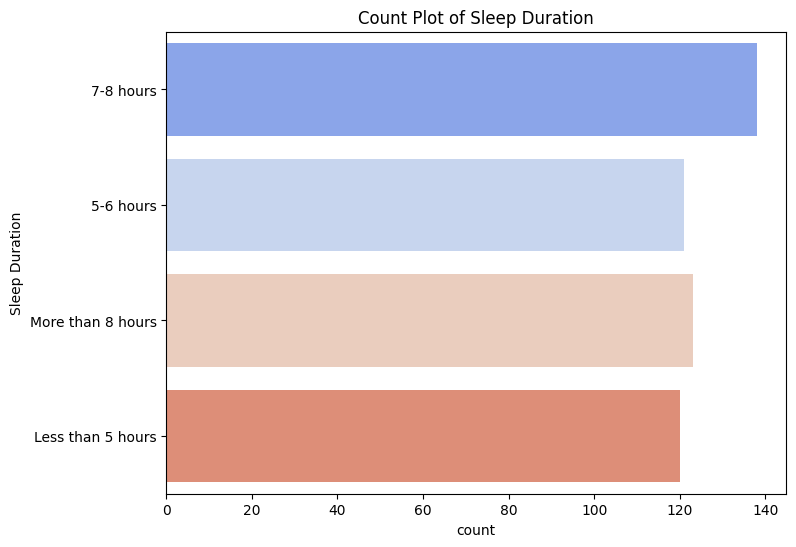

C:\Users\ncmia\AppData\Local\Temp\ipykernel_15700\2178482466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='coolwarm')


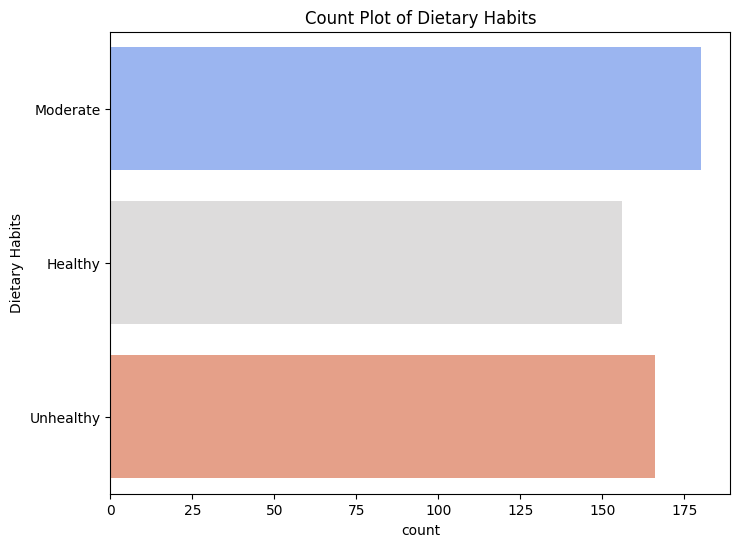

C:\Users\ncmia\AppData\Local\Temp\ipykernel_15700\2178482466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='coolwarm')


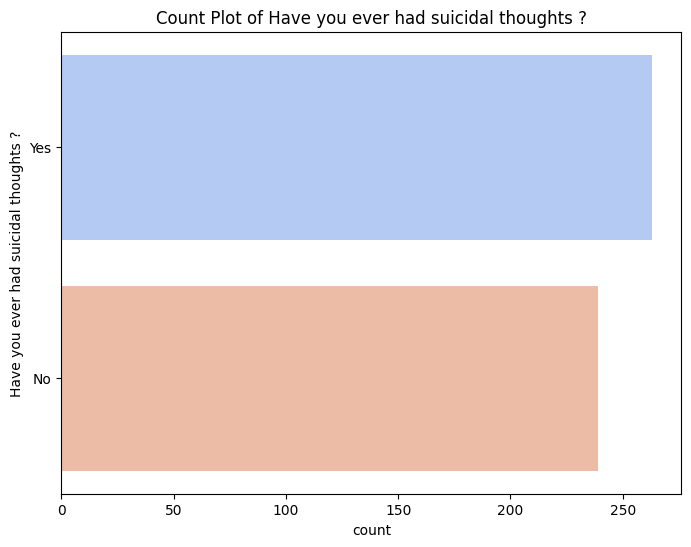

C:\Users\ncmia\AppData\Local\Temp\ipykernel_15700\2178482466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='coolwarm')


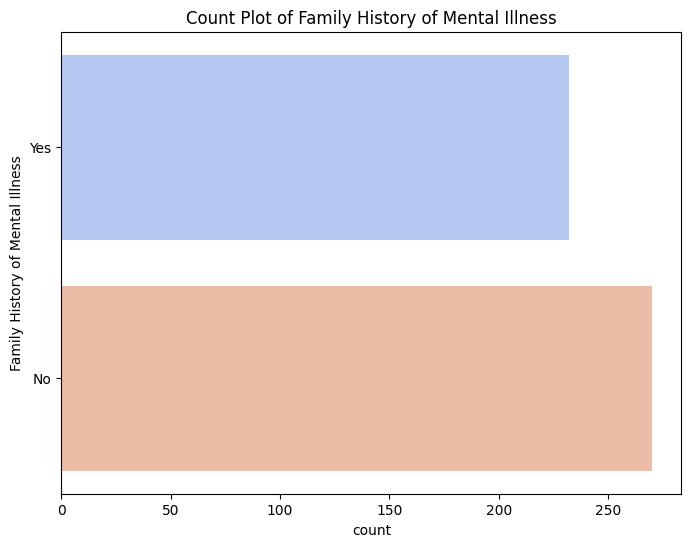

C:\Users\ncmia\AppData\Local\Temp\ipykernel_15700\2178482466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='coolwarm')


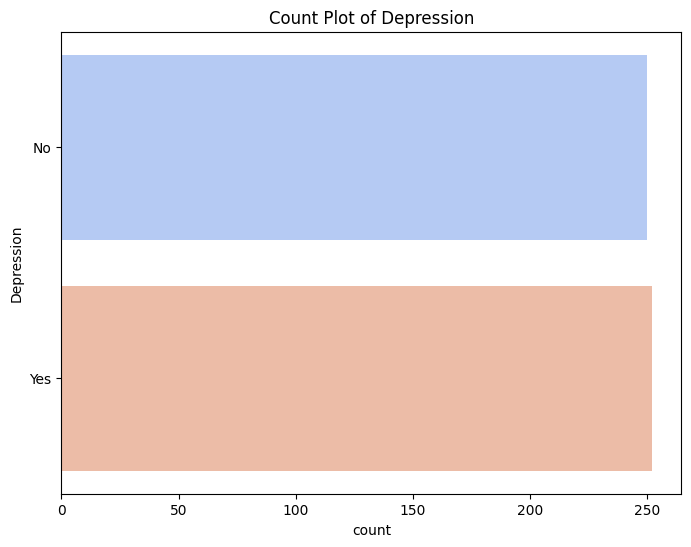

In [63]:
categorical_features = data.select_dtypes(include='object').columns
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data[col], palette='coolwarm')
    plt.title(f'Count Plot of {col}')
    plt.show()

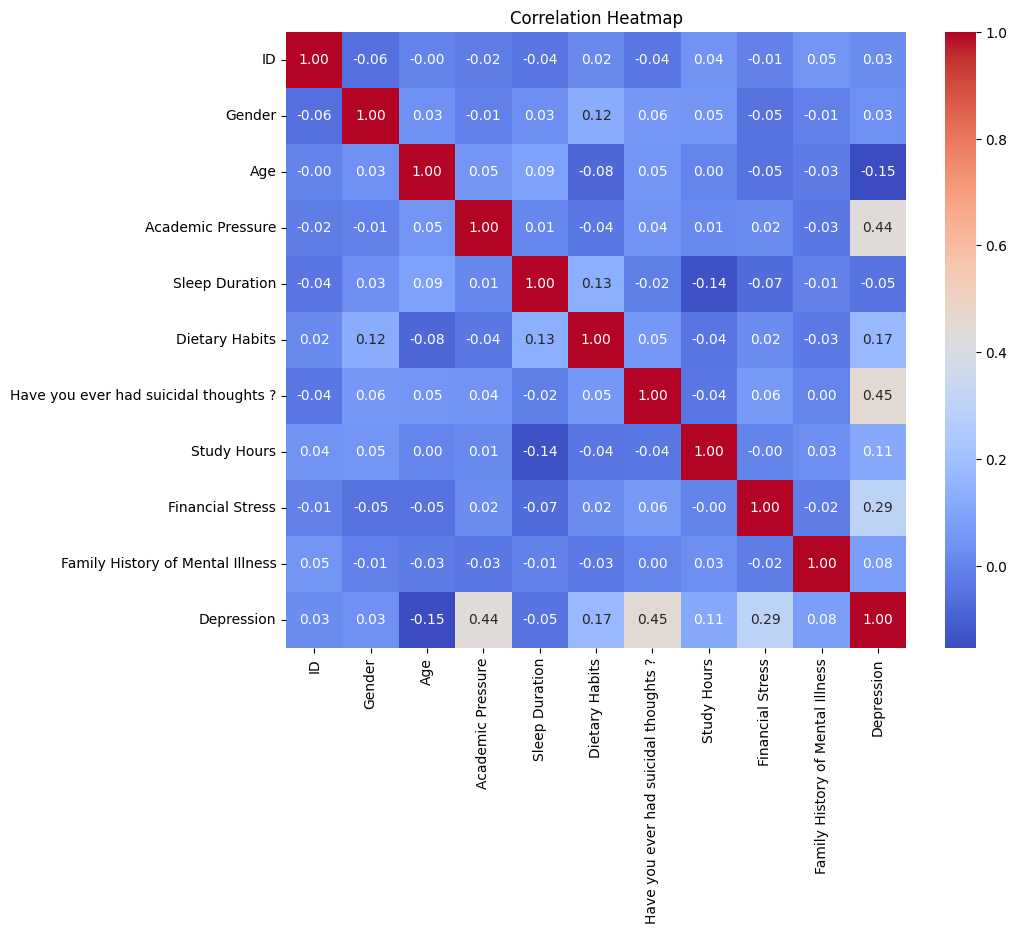

In [42]:
le = LabelEncoder()
for col in categorical_features:
    data[col] = le.fit_transform(data[col])

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


dividing the data as taining and testing data

In [43]:
# Splitting the dataset
X = data.drop(columns=['Depression']) 
y = data['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Standardize features for GaussianNB

In [44]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Gaussian Naive Bayes

In [45]:

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)

In [46]:
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"GaussianNB Accuracy: {accuracy_gnb:.2f}")

GaussianNB Accuracy: 0.83


This dataset has a 0.83 GaussianNB Accuracy that means 17% of the data tested was not classified correctly but the 83% was cr-orrectly classified.

Multinomial Naive Bayes

In [47]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

In [48]:
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"MultinomialNB Accuracy: {accuracy_mnb:.2f}")

MultinomialNB Accuracy: 0.73


Accuracy Score for MultinomialNB Accuracy was 0.93 which means only 73% of the data was correctly classified and the rest was wrongly classified.

Confusion Matrix

In [49]:
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)

Display Confusion Matrices

In [50]:

print("Confusion Matrix for GaussianNB:")
print(conf_matrix_gnb)

print("\nConfusion Matrix for MultinomialNB:")
print(conf_matrix_mnb)

Confusion Matrix for GaussianNB:
[[54 17]
 [ 8 72]]

Confusion Matrix for MultinomialNB:
[[52 19]
 [22 58]]


Cross-Validation Accuracy

In [51]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy_gnb = cross_val_score(gnb, X, y, cv=cv, scoring='accuracy')
cv_accuracy_mnb = cross_val_score(mnb, X, y, cv=cv, scoring='accuracy')

print(f"\nGaussianNB Cross-Validation Accuracy: {np.mean(cv_accuracy_gnb):.2f}")
print(f"MultinomialNB Cross-Validation Accuracy: {np.mean(cv_accuracy_mnb):.2f}")


GaussianNB Cross-Validation Accuracy: 0.82
MultinomialNB Cross-Validation Accuracy: 0.74


Compute ROC Curve for GaussianNB and MultinomialNB

In [52]:
y_prob_gnb = gnb.predict_proba(X_test_scaled)[:, 1]
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
 
y_prob_mnb = mnb.predict_proba(X_test)[:, 1]
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, y_prob_mnb)
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

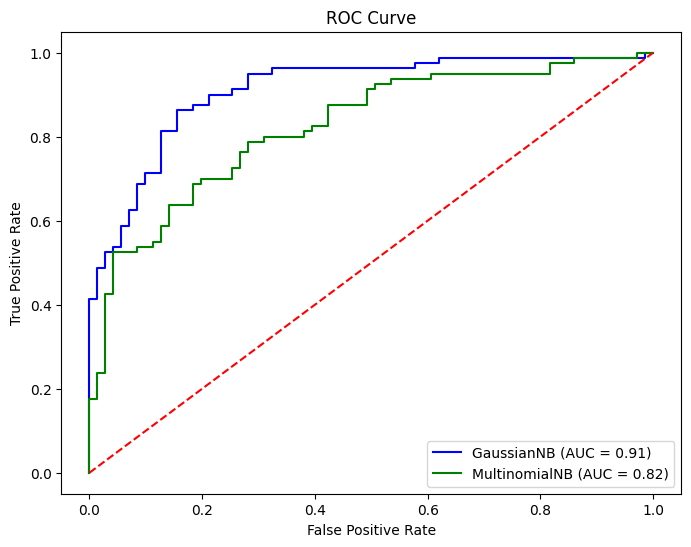

In [53]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, color='blue', label=f'GaussianNB (AUC = {roc_auc_gnb:.2f})')
plt.plot(fpr_mnb, tpr_mnb, color='green', label=f'MultinomialNB (AUC = {roc_auc_mnb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

This shows that the Multinomial Naive Bayes correctly classifies 73% of the data, but Gaussian Naive Bayes (with 83% accuracy) is likely the better-performing model for this dataset.